cuML Setup

In [ ]:
!nvidia-smi

Thu Nov 30 18:52:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 400, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 400 (delta 95), reused 52 (delta 51), pack-reused 269
Receiving objects: 100% (400/400), 109.76 KiB | 6.10 MiB/s, done.
Resolving deltas: 100% (197/197), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.1 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla V100-SXM2-16GB!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Found existing installation: cupy-cuda11x 11.0.0
Uninstalling cupy-cuda11x-11.0.0:
  Successfully uninstalled cupy-cuda11x-11.0.0
PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntu-toolchain-r/test/ubuntu/ jammy main'
Description:
Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntu-toolchain-r-ubuntu-test.gpg with fingerprint 60C317803A41BA51845E371A1E9377A2BA9EF27F
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/rep

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 40.0.1
Uninstalling cryptography-40.0.1:
  Successfully uninstalled cryptography-40.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.3/446.3 kB 18.7 MB/s eta 0:00:00
Installing RAPIDS Stable 23.10
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca

Preprocessing

In [ ]:
#Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import cuml
import cupy as cp

In [ ]:
#Import data
metadata = pd.read_csv('/content/drive/MyDrive/CSCI567 Project/application_metadata.csv')

In [ ]:
metadata['status'].value_counts()

ISS     3139764
ABN      977521
PEND     798795
Name: status, dtype: int64

In [ ]:
#Removing pending patents
metadata = metadata[metadata['status'] != 'PEND']

In [ ]:
metadata['status'].value_counts()

ISS    3139764
ABN     977521
Name: status, dtype: int64

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117285 entries, 0 to 4915887
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   doc-id                    int64  
 1   examiner_experience       int64  
 2   examiner_allowance_ratio  float64
 3   class_saturation          int64  
 4   subclass_saturation       int64  
 5   customer_experience       int64  
 6   customer_success_ratio    float64
 7   status                    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 282.7+ MB


In [ ]:
metadata.describe()

,doc-id,examiner_experience,examiner_allowance_ratio,class_saturation,subclass_saturation,customer_experience,customer_success_ratio
count,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06,4.117285e+06
mean,1.234501e+07,5.029763e+02,7.643155e-01,1.675307e+04,2.954730e+03,5.029763e+02,7.643155e-01
std,5.607356e+06,1.320641e+03,2.228962e-01,2.099201e+04,3.829545e+03,1.320641e+03,2.228962e-01
min,2.618355e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.010214e+07,1.030000e+02,6.315789e-01,2.936000e+03,4.590000e+02,1.030000e+02,6.315789e-01
50%,1.140475e+07,2.630000e+02,8.390142e-01,8.520000e+03,1.750000e+03,2.630000e+02,8.390142e-01
75%,1.262732e+07,5.720000e+02,9.437908e-01,2.127600e+04,4.032000e+03,5.720000e+02,9.437908e-01
max,9.603000e+07,2.694000e+04,1.000000e+00,1.255260e+05,3.846600e+04,2.694000e+04,1.000000e+00


In [ ]:
#Data seems to be skewed by earlier results. Taking only last ~1,000,000
metadata = metadata[3000000:]

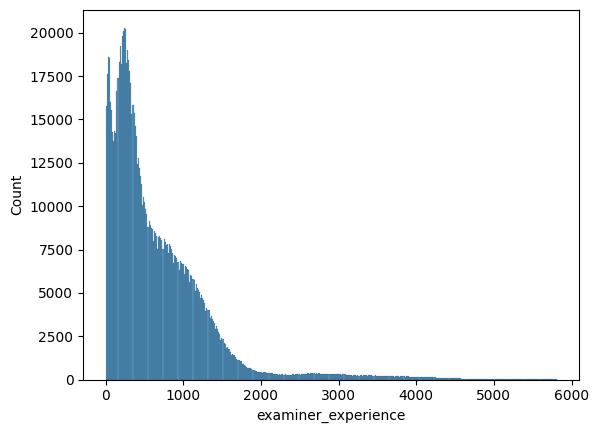

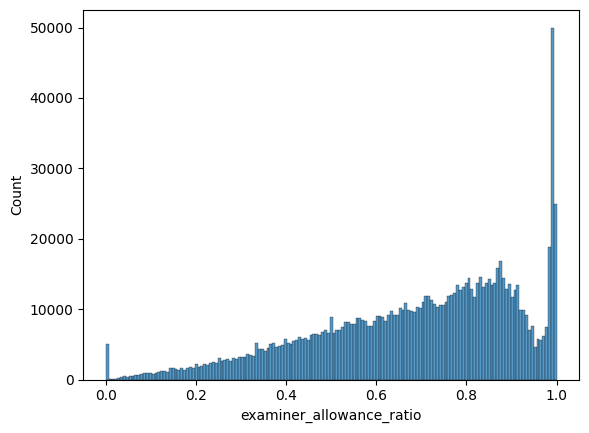

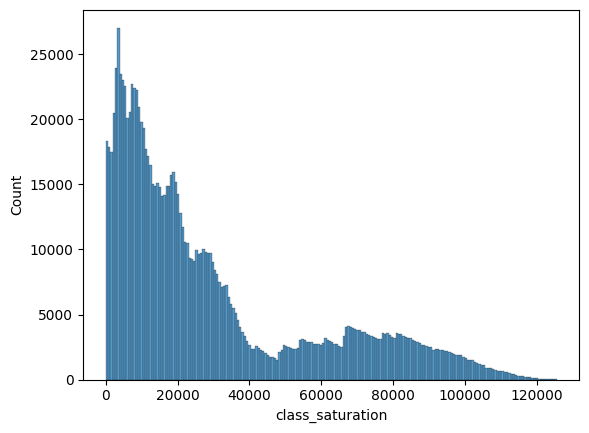

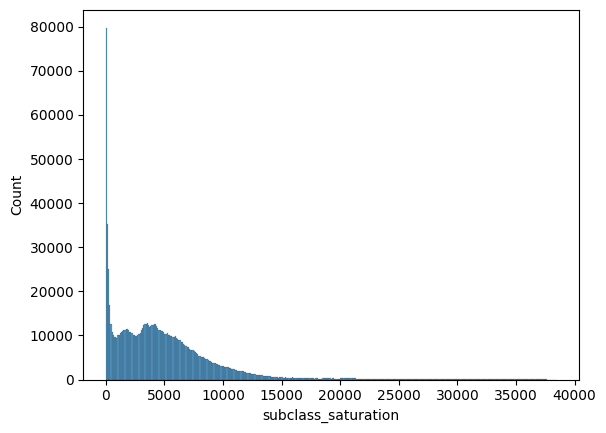

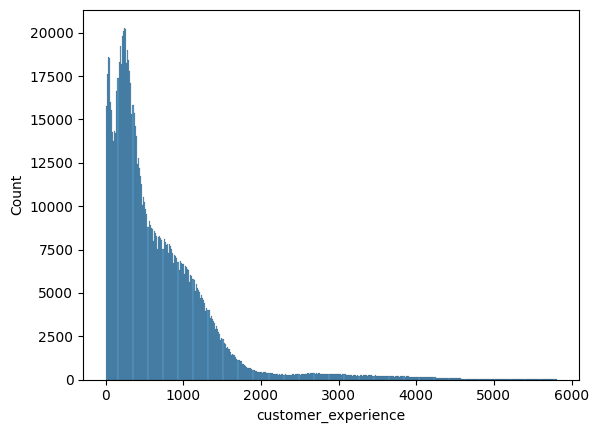

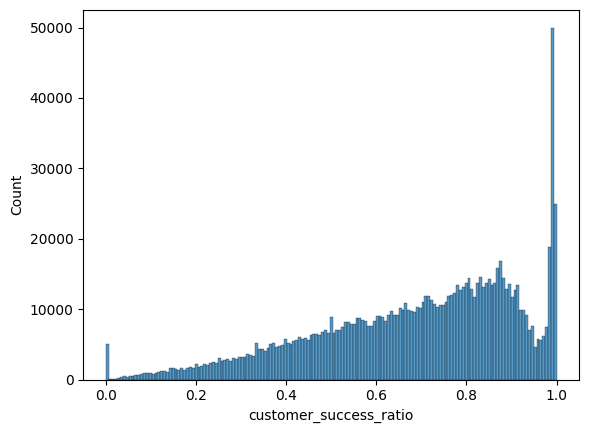

In [ ]:
#Plotting distributions for relevant features
for feature in ['examiner_experience', 'examiner_allowance_ratio', 'class_saturation', 'subclass_saturation', 'customer_experience', 'customer_success_ratio']:
  sns.histplot(metadata[feature])
  plt.show()

In [ ]:
#Encoding target feature
metadata['status'] = metadata['status'].replace({'ISS': 1, 'ABN': 0})
metadata['status'].value_counts()

1    844069
0    273216
Name: status, dtype: int64

In [ ]:
#Splitting into train and test (not shuffling to keep data sequential)
from sklearn.model_selection import train_test_split

X = metadata.drop(['status', 'doc-id'], axis=1)
y = metadata['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

In [ ]:
#Scaling data using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

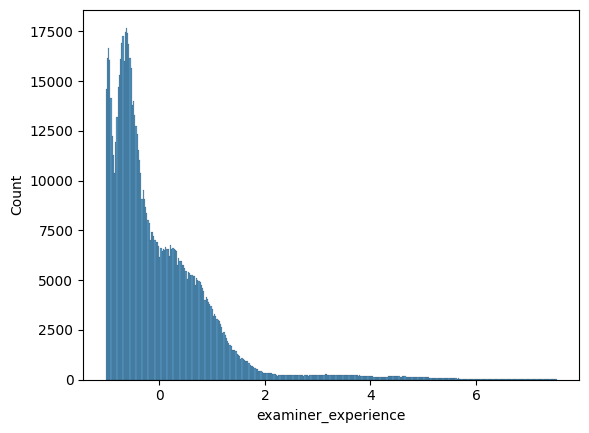

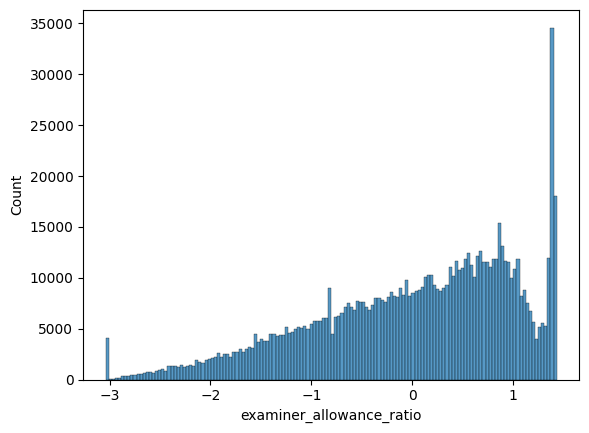

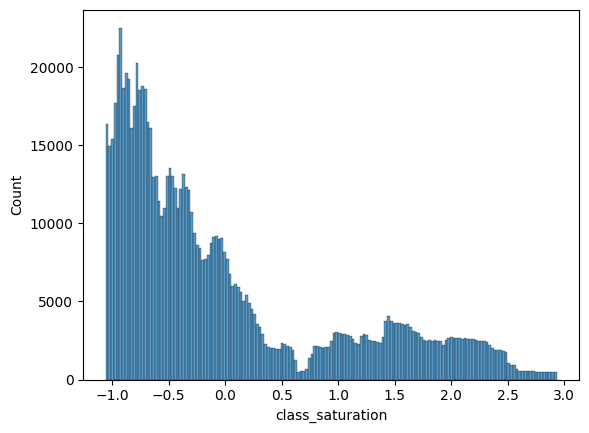

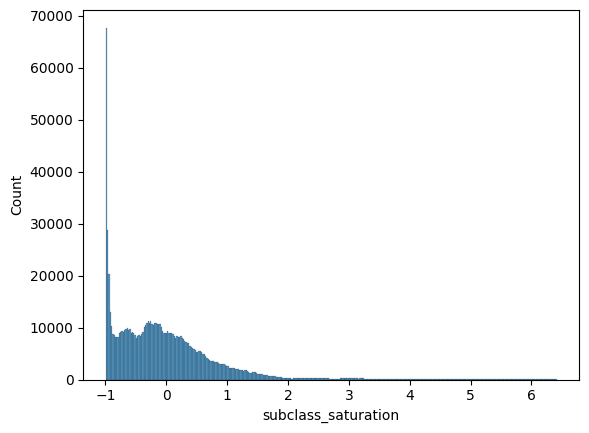

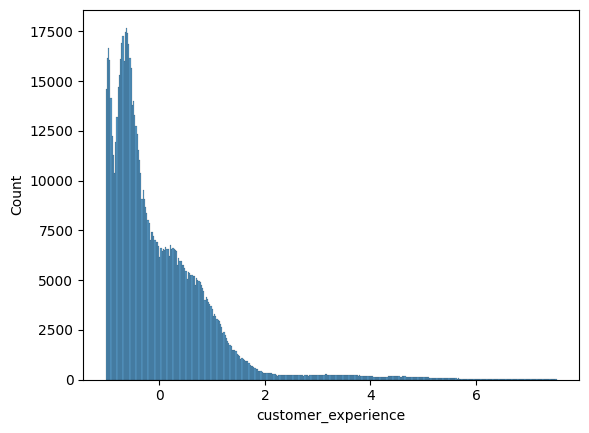

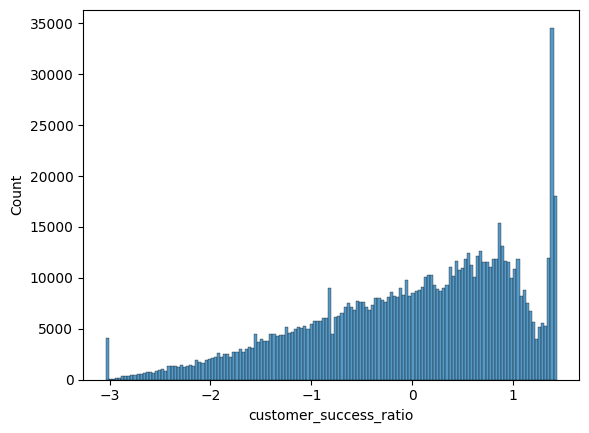

In [ ]:
#Plotting distributions for relevant features in training set after scaling
for feature in ['examiner_experience', 'examiner_allowance_ratio', 'class_saturation', 'subclass_saturation', 'customer_experience', 'customer_success_ratio']:
  sns.histplot(X_train[feature])
  plt.show()

In [ ]:
X_train.describe()

,examiner_experience,examiner_allowance_ratio,class_saturation,subclass_saturation,customer_experience,customer_success_ratio
count,8.938280e+05,8.938280e+05,8.938280e+05,8.938280e+05,8.938280e+05,8.938280e+05
mean,-6.707733e-17,3.693307e-16,5.043121e-17,3.680588e-17,-6.707733e-17,3.693307e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.014396e+00,-3.038604e+00,-1.056936e+00,-9.940641e-01,-1.014396e+00,-3.038604e+00
25%,-6.667279e-01,-6.704843e-01,-7.615958e-01,-6.823690e-01,-6.667279e-01,-6.704843e-01
50%,-3.060630e-01,1.696502e-01,-3.698908e-01,-1.864905e-01,-3.060630e-01,1.696502e-01
75%,4.201407e-01,8.056560e-01,4.077194e-01,3.529337e-01,4.201407e-01,8.056560e-01
max,7.524590e+00,1.432253e+00,2.932759e+00,6.412445e+00,7.524590e+00,1.432253e+00


Model Training and Evaluation

In [ ]:
#Training and evluating XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='gpu_hist')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1: {f1:.4f}')

Accuracy: 0.8332
Precision: 0.8723
Recall: 0.9372
F1: 0.9036


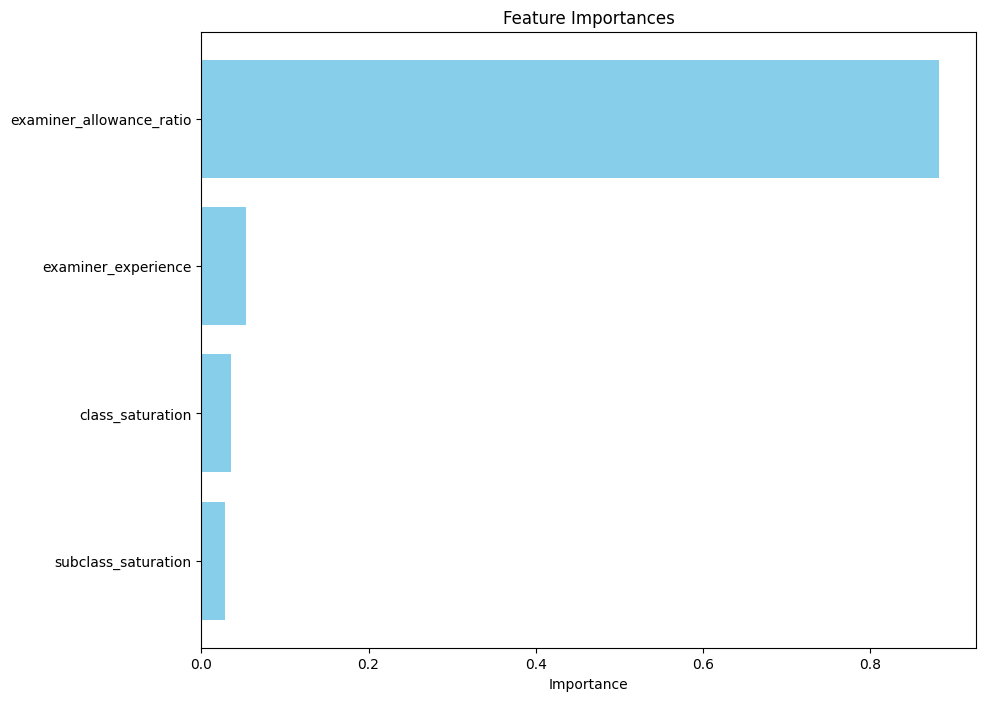

In [ ]:
importances = xgb.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=True)

# Creating the bar plot
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_sorted['Feature'][2:], feature_importances_sorted['Importance'][2:], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
#Converting datasets to cuML format to train cuML algorithms
import cudf

def convert_to_cuml_format(X_train, y_train, X_test, y_test):

    X_train_cuml = cudf.DataFrame.from_pandas(X_train)
    y_train_cuml = cudf.Series(y_train.values)
    X_test_cuml = cudf.DataFrame.from_pandas(X_test)
    y_test_cuml = cudf.Series(y_test.values)

    return X_train_cuml, y_train_cuml, X_test_cuml, y_test_cuml

X_train, y_train, X_test, y_test = convert_to_cuml_format(X_train, y_train, X_test, y_test)

In [ ]:
#Training and evaluating SVM with Gaussian kernel
from cuml.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test.to_numpy(), y_pred.to_numpy())
precision = precision_score(y_test.to_numpy(), y_pred.to_numpy())
recall = recall_score(y_test.to_numpy(), y_pred.to_numpy())
f1 = f1_score(y_test.to_numpy(), y_pred.to_numpy())

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1: {f1:.4f}')

Accuracy: 0.8397
Precision: 0.8690
Recall: 0.9511
F1: 0.9082


In [ ]:
#Training and evaluating Logistic Regression classifier
from cuml.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test.to_numpy(), y_pred.to_numpy())
precision = precision_score(y_test.to_numpy(), y_pred.to_numpy())
recall = recall_score(y_test.to_numpy(), y_pred.to_numpy())
f1 = f1_score(y_test.to_numpy(), y_pred.to_numpy())

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1: {f1:.4f}')

Accuracy: 0.8329
Precision: 0.8750
Recall: 0.9327
F1: 0.9029
